# Pandas Lahman Baseball

See: https://www.kaggle.com/seanlahman/the-history-of-baseball/notebooks?sortBy=hotness&group=everyone&pageSize=20&datasetId=26&language=Python

In [1]:
# See: https://www.kaggle.com/gracezhou0912/baseball-analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [3]:
player_csv   = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv"
salary_csv   = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Salaries.csv"
team_csv     = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv"
fielding_csv = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv"

player  = pd.read_csv(player_csv)
salary   = pd.read_csv(salary_csv)
team     = pd.read_csv(team_csv)
fielding = pd.read_csv(fielding_csv)

print(player.columns)
print(salary.columns)
print(team.columns)
print(fielding.columns)

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')
Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')
Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS',

Text(0.5, 1.0, 'Baseball player salary over years')

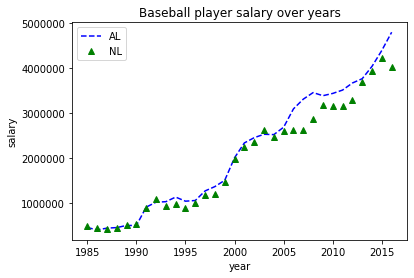

In [5]:
# first, we focus on some general analysis salary between leagues and year
import warnings

warnings.filterwarnings('ignore')
data = salary.groupby(["yearID","lgID"]).mean().unstack().copy(deep = True)
# see the salary trend
plt.plot(data["salary"]["AL"], 'b--', data["salary"]["NL"], 'g^')
plt.xlabel("year")
plt.ylabel("salary")
plt.legend(["AL","NL"], loc = "leftup")
plt.title("Baseball player salary over years")

***
Index(['1B', '2B', '3B', 'C', 'OF', 'P', 'SS'], dtype='object', name='POS')
***


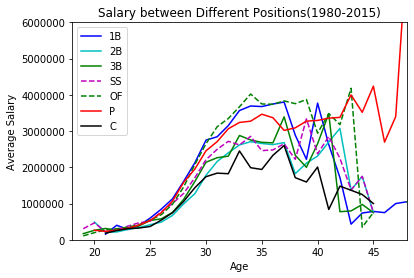

In [24]:
warnings.filterwarnings('ignore')
player_position = pd.merge(salary, fielding, on = ["playerID","yearID"])[["yearID", "playerID", "salary", "POS"]]
player_position = pd.merge(player_position, player, on = ["playerID"], how = "left")[["yearID", "playerID","salary", "POS", "birthYear"]]
player_position["age"] = player_position["yearID"] - player_position["birthYear"] 
player_position = player_position[player_position.yearID >= 1980]
data = player_position.groupby(["age", "POS"]).mean()["salary"].unstack()

print("***")
print(data.columns)
print("***")

plt.plot(data["1B"], 'b-', data["2B"], 'c-', data["3B"], 'g-', data["SS"], 'm--', data['OF'], 'g--', data['P'],'r-', data['C'],'k-')
_ = plt.xlabel("Age")
_ = plt.ylabel("Average Salary")
_ = plt.legend(["1B",'2B','3B','SS',"OF","P","C"], loc = 'leftup')
_ = plt.title("Salary between Different Positions(1980-2015)")
_ = plt.xlim([18,48])
_ = plt.ylim([0,6000000])